In [1]:
# conda install -c conda-forge pytrends

In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

kw_list = ["Ixom", "/g/1tgv3y0d", "Cleveland Bay Chemicals", "/m/0gpgjw", "/g/11b7cbc2fp"]
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-VIC', gprop='')
data_after_2015_VIC = pytrends.interest_over_time()
data_after_2015_VIC.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-NSW', gprop='')
data_after_2015_NSW = pytrends.interest_over_time()
data_after_2015_NSW.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-QLD', gprop='')
data_after_2015_QLD = pytrends.interest_over_time()
data_after_2015_QLD.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-SA', gprop='')
data_after_2015_SA = pytrends.interest_over_time()
data_after_2015_SA.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-WA', gprop='')
data_after_2015_WA = pytrends.interest_over_time()
data_after_2015_WA.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2009-01-01 2015-01-01', geo='AU', gprop='')
data_before_2015 = pytrends.interest_over_time()
data_before_2015.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU', gprop='')
data_after_2015 = pytrends.interest_over_time()
data_after_2015.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)

In [3]:
pytrends.suggestions('Nalco')

[{'mid': '/m/07tpjq',
  'title': 'National Aluminium Company',
  'type': 'Mining company'},
 {'mid': '/g/1tc_wj5d', 'title': 'Nalco', 'type': 'Topic'},
 {'mid': '/m/0gpgjw', 'title': 'Nalco Water', 'type': 'Company'},
 {'mid': '/m/02px6bl', 'title': 'NALCO', 'type': 'Town in India'},
 {'mid': '/g/1tdmhx71', 'title': 'NALCO BHAWAN', 'type': 'Topic'}]

In [4]:
pytrends.suggestions('Omega Chemicals')

[{'mid': '/g/11b7cbc2fp', 'title': 'Omega Chemicals', 'type': 'Topic'},
 {'mid': '/g/11dd_r6fvb',
  'title': 'Omega Chemicals S.A. de C.V.',
  'type': 'Chemical plant in San Luis Potosí, Mexico'},
 {'mid': '/g/12bn6q9lp',
  'title': 'Vibrant Matter: A Political Ecology of Things',
  'type': 'Topic'}]

In [5]:
pytrends.suggestions('cleveland bay')

[{'mid': '/m/04rb18', 'title': 'Cleveland Bay', 'type': 'Breed'},
 {'mid': '/g/11bxfgmkz1', 'title': 'Cleveland Bay', 'type': 'Queensland'},
 {'mid': '/m/03nr02g',
  'title': 'Bayou Academy',
  'type': 'School in Cleveland, Mississippi'},
 {'mid': '/m/01myvs',
  'title': 'Cleveland Hopkins International Airport',
  'type': 'Airport in Cuyahoga County, Ohio'}]

In [6]:
pytrends.suggestions('Coogee Chemicals')

[{'mid': '/g/1tgv3y0d',
  'title': 'Coogee Chemicals',
  'type': 'Chemical manufacturer in Kwinana Beach, Australia'}]

In [7]:
pytrends.suggestions('Grenof')

[{'mid': '/g/11f1kzvhhp',
  'title': 'Grenof',
  'type': 'Technical service in the Warana, Queensland, Australia'},
 {'mid': '/g/11dxbc_0kq', 'title': 'Grenofen', 'type': 'Hamlet in England'}]

In [8]:
pytrends.suggestions('Calix')

[{'mid': '/m/0cdj1t', 'title': 'Calix, Inc.', 'type': 'Company'},
 {'mid': '/g/11h23x2x1q', 'title': 'Calixo', 'type': 'YouTube channel'},
 {'mid': '/m/0n5vjp4',
  'title': 'Calix Limited',
  'type': 'Aquaculture company'},
 {'mid': '/g/11c5zch5km',
  'title': 'Jorge Calix',
  'type': 'Member of the National Congress of Honduras'},
 {'mid': '/g/11c59n1pgg', 'title': 'Calix Inc', 'type': 'Topic'}]

In [9]:
newkw_list = ["Ixom", "Coogee Chemicals", "Cleveland Bay Chemicals", "Nalco Water", "Omega Chemicals"]

In [10]:
mean_before = round(data_before_2015.mean(), 2)
mean_after = round(data_after_2015.mean(), 2)
for kw in newkw_list:
    print(kw + ":" + str(mean_before[kw]))

Ixom:3.42
Coogee Chemicals:11.11
Cleveland Bay Chemicals:0.0
Nalco Water:5.22
Omega Chemicals:6.26


In [11]:
for kw in newkw_list:
    print(kw + ":" + str(mean_after[kw]))

Ixom:24.96
Coogee Chemicals:16.4
Cleveland Bay Chemicals:0.0
Nalco Water:12.11
Omega Chemicals:9.93


In [12]:
data_after_2015_VIC.to_csv('Google Trend/data_after_2015_VIC.csv')
data_after_2015_NSW.to_csv('Google Trend/data_after_2015_NSW.csv')
data_after_2015_QLD.to_csv('Google Trend/data_after_2015_QLD.csv')
data_after_2015_SA.to_csv('Google Trend/data_after_2015_SA.csv')
data_after_2015_WA.to_csv('Google Trend/data_after_2015_WA.csv')

In [13]:
data_after_2015.to_csv('Google Trend/trends data after 2015.csv')
data_after_2015

,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial
date,,,,,,
2015-03-01,45,0,0,42,18,False
2015-04-01,41,0,0,0,0,False
2015-05-01,0,0,0,31,0,False
2015-06-01,0,24,0,0,0,False
2015-07-01,53,25,0,0,0,False
...,...,...,...,...,...,...
2021-11-01,0,16,0,0,47,False
2021-12-01,0,0,0,0,17,False
2022-01-01,22,32,0,0,20,False


In [14]:
data_before_2015.to_csv('Google Trend/trends data before 2015.csv')
data_before_2015

,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial
date,,,,,,
2009-01-01,24,0,0,0,26,False
2009-02-01,0,44,0,100,0,False
2009-03-01,0,89,0,0,0,False
2009-04-01,0,0,0,0,0,False
2009-05-01,0,0,0,23,46,False
...,...,...,...,...,...,...
2014-09-01,0,13,0,9,0,False
2014-10-01,8,13,0,0,0,False
2014-11-01,7,17,0,0,0,False


In [15]:
data_after_2015

,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial
date,,,,,,
2015-03-01,45,0,0,42,18,False
2015-04-01,41,0,0,0,0,False
2015-05-01,0,0,0,31,0,False
2015-06-01,0,24,0,0,0,False
2015-07-01,53,25,0,0,0,False
...,...,...,...,...,...,...
2021-11-01,0,16,0,0,47,False
2021-12-01,0,0,0,0,17,False
2022-01-01,22,32,0,0,20,False


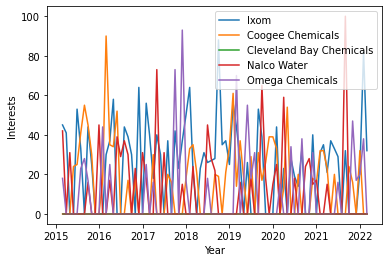

In [16]:
import matplotlib.pyplot as plt

plt.plot(data_after_2015)
plt.legend(newkw_list)
plt.xlabel("Year")
plt.ylabel("Interests")
plt.show()

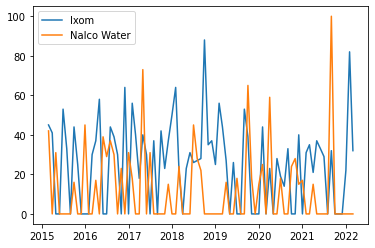

In [17]:
focus = ["Ixom", "Nalco Water"]
plt.plot(data_after_2015[focus])
plt.legend(focus)
plt.show()

In [18]:
region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
region.rename(columns = {'/g/1tgv3y0d':'Coogee Chemicals','/m/0gpgjw':'Nalco Water', '/g/11b7cbc2fp':'Omega Chemicals'}, inplace = True)
region

,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals
geoName,,,,,
Australian Capital Territory,0,0,0,0,0
New South Wales,72,15,0,13,0
Northern Territory,0,0,0,0,0
Queensland,34,52,0,14,0
South Australia,100,0,0,0,0
Tasmania,0,0,0,0,0
Victoria,59,9,0,7,25
Western Australia,7,79,0,14,0


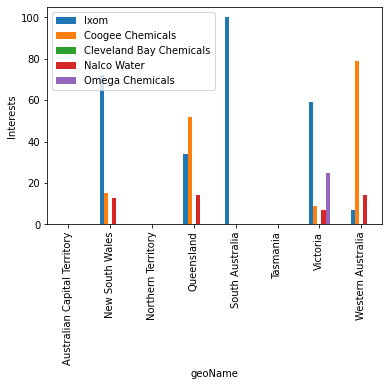

In [19]:
region.plot(kind = 'bar')
plt.ylabel("Interests")
plt.show()

In [20]:
pytrends.related_queries() # related queries in last 7 years

{'Ixom': {'top':              query  value
  0            orica    100
  1   ixom chemicals     54
  2  orica chemicals     23
  3      ixom botany     20,
  'rising':              query    value
  0            orica  2240150
  1   ixom chemicals  1200100
  2  orica chemicals   518850
  3      ixom botany   456150},
 '/g/1tgv3y0d': {'top':               query  value
  0  coogee chemicals    100,
  'rising': None},
 'Cleveland Bay Chemicals': {'top': None, 'rising': None},
 '/m/0gpgjw': {'top':              query  value
  0  nalco australia    100,
  'rising': None},
 '/g/11b7cbc2fp': {'top':              query  value
  0  omega chemicals    100,
  'rising': None}}

In [21]:
import pandas as pd
bigdata = pd.concat([data_before_2015, data_after_2015], sort=False)

In [22]:
bigdata

,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial
date,,,,,,
2009-01-01,24,0,0,0,26,False
2009-02-01,0,44,0,100,0,False
2009-03-01,0,89,0,0,0,False
2009-04-01,0,0,0,0,0,False
2009-05-01,0,0,0,23,46,False
...,...,...,...,...,...,...
2021-11-01,0,16,0,0,47,False
2021-12-01,0,0,0,0,17,False
2022-01-01,22,32,0,0,20,False


In [23]:
import pandas as pd

In [24]:
google_nsw = pd.read_csv('Google Trend/data_after_2015_NSW.csv')
google_qld = pd.read_csv('Google Trend/data_after_2015_QLD.csv')
google_sa = pd.read_csv('Google Trend/data_after_2015_SA.csv')
google_vic = pd.read_csv('Google Trend/data_after_2015_VIC.csv')
google_wa = pd.read_csv('Google Trend/data_after_2015_WA.csv')
google_after2015 = pd.read_csv('Google Trend/trends data after 2015.csv')


In [25]:
google_nsw['sos_alum'] = 0
google_nsw['sos_pac23'] = 0
google_nsw['sos_pac10'] = 0

google_qld['sos_alum'] = 0
google_qld['sos_pac23'] = 0
google_qld['sos_pac10'] = 0

google_sa['sos_alum'] = 0
google_sa['sos_pac23'] = 0
google_sa['sos_pac10'] = 0

google_vic['sos_alum'] = 0
google_vic['sos_pac23'] = 0
google_vic['sos_pac10'] = 0

google_wa['sos_alum'] = 0
google_wa['sos_pac23'] = 0
google_wa['sos_pac10'] = 0

google_after2015['sos_alum'] = 0
google_after2015['sos_pac23'] = 0
google_after2015['sos_pac10'] = 0

In [26]:
def alum_cal_share_search (db):
    db.loc[:,'sos_alum'] = (db['Ixom'])/(db['Ixom']+
                                                             db['Coogee Chemicals']+
                                                             db['Cleveland Bay Chemicals']+
                                                             db['Nalco Water']+
                                                             db['Omega Chemicals'])
    db['sos_alum'] = db['sos_alum'].fillna(0)
    return db

def pac_23_cal_share_search (db):
    db.loc[:,'sos_pac23'] = (db['Ixom'])/(db['Ixom']+
                                                             db['Nalco Water']+
                                                             db['Omega Chemicals'])
    db['sos_pac23'] = db['sos_pac23'].fillna(0)
    return db

def pac_10_cal_share_search (db):
    db.loc[:,'sos_pac10'] = (db['Ixom'])/(db['Ixom']+
                                                             db['Omega Chemicals'])
    db['sos_pac10'] = db['sos_pac10'].fillna(0)
    return db


In [27]:
google_nsw = alum_cal_share_search(google_nsw)
google_nsw = pac_23_cal_share_search(google_nsw)
google_nsw = pac_10_cal_share_search(google_nsw)


google_qld = alum_cal_share_search(google_qld)
google_qld = pac_23_cal_share_search(google_qld)
google_qld = pac_10_cal_share_search(google_qld)

google_sa = alum_cal_share_search(google_sa)
google_sa = pac_23_cal_share_search(google_sa)
google_sa = pac_10_cal_share_search(google_sa)

google_vic = alum_cal_share_search(google_vic)
google_vic = pac_23_cal_share_search(google_vic)
google_vic = pac_10_cal_share_search(google_vic)

google_wa = alum_cal_share_search(google_wa)
google_wa = pac_23_cal_share_search(google_wa)
google_wa = pac_10_cal_share_search(google_wa)

google_after2015 = alum_cal_share_search(google_after2015)
google_after2015 = pac_23_cal_share_search(google_after2015)
google_after2015 = pac_10_cal_share_search(google_after2015)

In [28]:
selesct_column = ['date', 'sos_alum', 'sos_pac23', 'sos_pac10']
sos_nsw = google_nsw.loc[:,selesct_column]
sos_qld = google_qld.loc[:,selesct_column]
sos_sa = google_sa.loc[:,selesct_column]
sos_vic = google_vic.loc[:,selesct_column]
sos_wa = google_wa.loc[:,selesct_column]
sos_after2015 = google_after2015.loc[:,selesct_column]


In [29]:
sos_nsw.to_csv('share of search/sos_nsw.csv')
sos_qld.to_csv('share of search/sos_qld.csv')
sos_sa.to_csv('share of search/sos_sa.csv')
sos_vic.to_csv('share of search/sos_vic.csv')
sos_wa.to_csv('share of search/sos_wa.csv')
sos_after2015.to_csv('share of search/sos_after2015.csv')
